In [24]:
import pandas as pd
from datetime import datetime, timedelta

In [18]:
data=pd.read_csv(r'/content/drive/MyDrive/Data set/Raw GPS data Kandy Buses/preprocess data-digana_2021_10.csv/clearn_gps_data_with_trip_id.csv')

In [25]:
def reference_time(input_time):# Your input time in "YYYY-MM-DD HH:MM:SS" format
  # Example: Get the date of Monday for a given date
  # Convert the input date to a datetime object
  date_obj = datetime.strptime(input_time, "%Y-%m-%d %H:%M:%S")

  # Find the day of the week (Monday = 0, Tuesday = 1, ..., Sunday = 6)
  day_of_week = date_obj.weekday()

  # Calculate the number of days to subtract to get to the previous Monday
  days_to_subtract = day_of_week

  # Subtract the number of days to get the previous Monday
  previous_monday = date_obj - timedelta(days=days_to_subtract)

  # Format the previous Monday date as a string
  previous_monday = previous_monday.replace(hour=0, minute=0,second
                                                =0)
  previous_monday_str = previous_monday.strftime("%Y-%m-%d %H:%M:%S")

  # Print the previous Monday date
  # print(previous_monday_str)
  return previous_monday
reference_time("2023-06-22 03:05:30")

datetime.datetime(2023, 6, 19, 0, 0)

In [28]:
# Convert time values to seconds since the reference time
time_in_seconds = [(datetime.strptime(row['devicetime'], "%Y-%m-%d %H:%M:%S") - reference_time(row['devicetime'])).total_seconds()
                   for index,row in data.iterrows()]
time_array = [time for time in time_in_seconds]
data['time_in_seconds'] = time_array

In [29]:
data.head()

,id,deviceid,devicetime,latitude,longitude,speed,date,time,trip_id,time_in_seconds
0,574670748,116,2021-10-16 07:08:31,7.299052,80.734410,7.01944,2021-10-16,07:08:31,1.0,457711.0
1,574670749,116,2021-10-16 07:08:46,7.298598,80.733327,19.43850,2021-10-16,07:08:46,1.0,457726.0
2,574670750,116,2021-10-16 07:09:01,7.297437,80.732405,26.45790,2021-10-16,07:09:01,1.0,457741.0
3,574670751,116,2021-10-16 07:09:07,7.297405,80.731912,5.93953,2021-10-16,07:09:07,1.0,457747.0
4,574670752,116,2021-10-16 07:09:22,7.297420,80.731760,11.33910,2021-10-16,07:09:22,1.0,457762.0


In [49]:
trip_data_1=data[data['trip_id']==1]
trip_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               185 non-null    int64  
 1   deviceid         185 non-null    int64  
 2   devicetime       185 non-null    object 
 3   latitude         185 non-null    float64
 4   longitude        185 non-null    float64
 5   speed            185 non-null    float64
 6   date             185 non-null    object 
 7   time             185 non-null    object 
 8   trip_id          185 non-null    float64
 9   time_in_seconds  185 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 15.9+ KB


In [50]:
trip_data_1["time1"]= pd.to_datetime(trip_data_1["time"])
trip_data_1.head()

<ipython-input-50-376bdbd5bc6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_data_1["time1"]= pd.to_datetime(trip_data_1["time"])


,id,deviceid,devicetime,latitude,longitude,speed,date,time,trip_id,time_in_seconds,time1
0,574670748,116,2021-10-16 07:08:31,7.299052,80.734410,7.01944,2021-10-16,07:08:31,1.0,457711.0,2023-06-30 07:08:31
1,574670749,116,2021-10-16 07:08:46,7.298598,80.733327,19.43850,2021-10-16,07:08:46,1.0,457726.0,2023-06-30 07:08:46
2,574670750,116,2021-10-16 07:09:01,7.297437,80.732405,26.45790,2021-10-16,07:09:01,1.0,457741.0,2023-06-30 07:09:01
3,574670751,116,2021-10-16 07:09:07,7.297405,80.731912,5.93953,2021-10-16,07:09:07,1.0,457747.0,2023-06-30 07:09:07
4,574670752,116,2021-10-16 07:09:22,7.297420,80.731760,11.33910,2021-10-16,07:09:22,1.0,457762.0,2023-06-30 07:09:22


In [ ]:
# data["time"]= pd.to_datetime(data["time"],format='%H:%M:%S.%f')

In [51]:
trip_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               185 non-null    int64         
 1   deviceid         185 non-null    int64         
 2   devicetime       185 non-null    object        
 3   latitude         185 non-null    float64       
 4   longitude        185 non-null    float64       
 5   speed            185 non-null    float64       
 6   date             185 non-null    object        
 7   time             185 non-null    object        
 8   trip_id          185 non-null    float64       
 9   time_in_seconds  185 non-null    float64       
 10  time1            185 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 17.3+ KB


In [7]:
# trip_data_1.set_index('time')

In [52]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

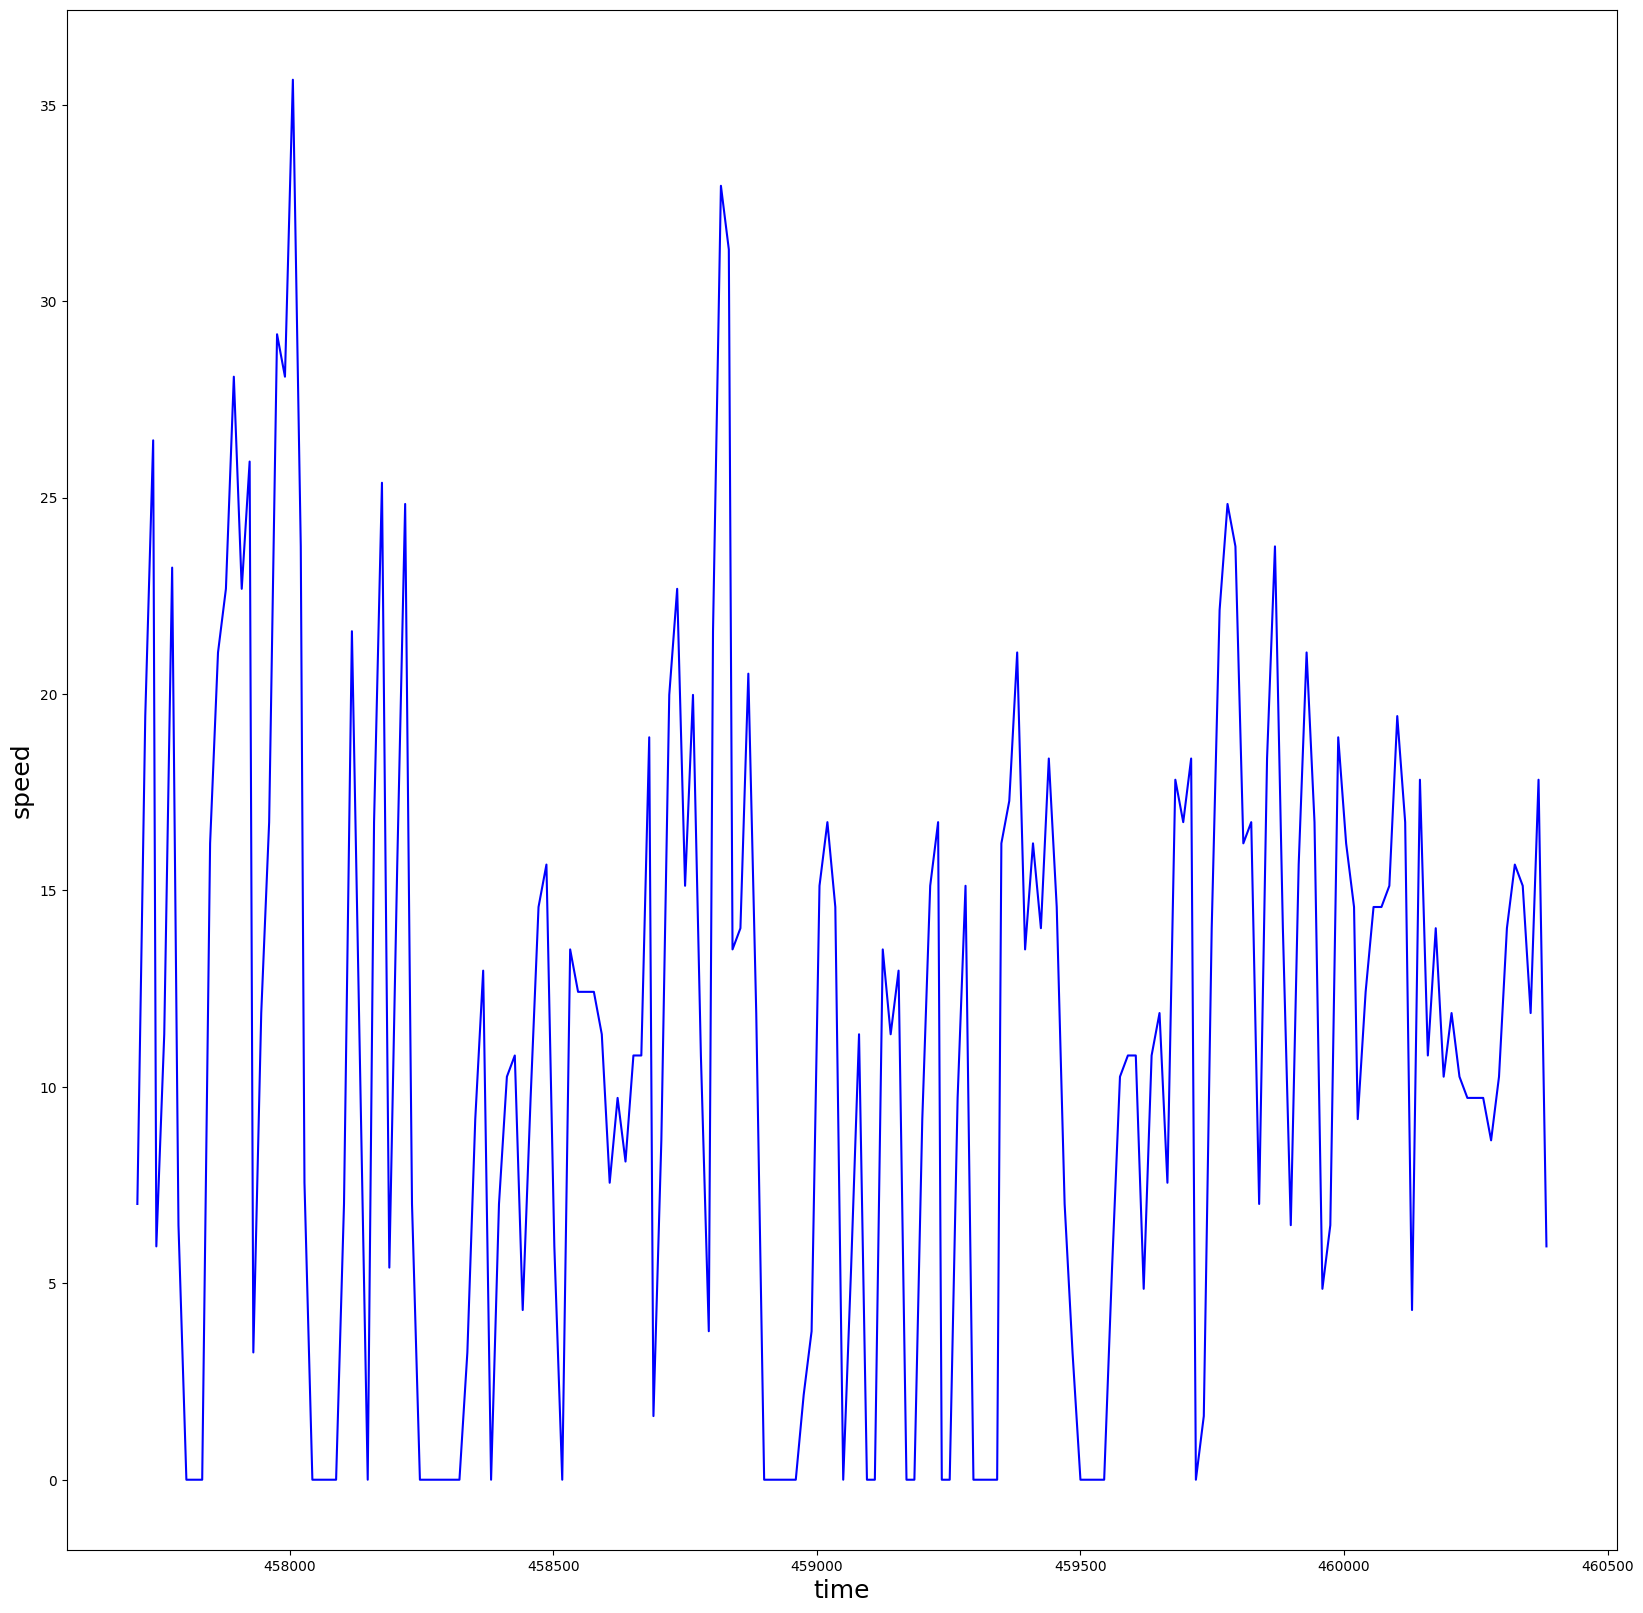

In [53]:
fig = plt.figure(figsize=(20,20))
# plt.scatter(trip_data_1['time'],trip_data_1['speed'],c=trip_data_1['trip_id'])
# Define colors for each segment of the line
colors = ['red', 'blue', 'green', 'purple']
plt.plot(trip_data_1['time_in_seconds'],trip_data_1['speed'], color='blue')
plt.xlabel('time',fontsize=18)
plt.ylabel('speed',fontsize=18)
plt.show()#not important to see the plotat

In [48]:
# fig = plt.figure(figsize=(5,5))
# ax = plt.axes(projection ="3d")
# ax.scatter3D(trip_data_1['latitude'],trip_data_1['longitude'],trip_data_1['speed'],c=trip_data_1['trip_id'])
# plt.title("simple 3D scatter plot")
# ax.set_xlabel('latitude',fontsize=5)
# ax.set_ylabel('longitude',fontsize=5)
# ax.set_zlabel('speed',fontsize=5,rotation=90)
# ax.zaxis.labelpad=-4
# plt.show()#not important to see the plotat

In [54]:
data["time"]= pd.to_datetime(data["time"])

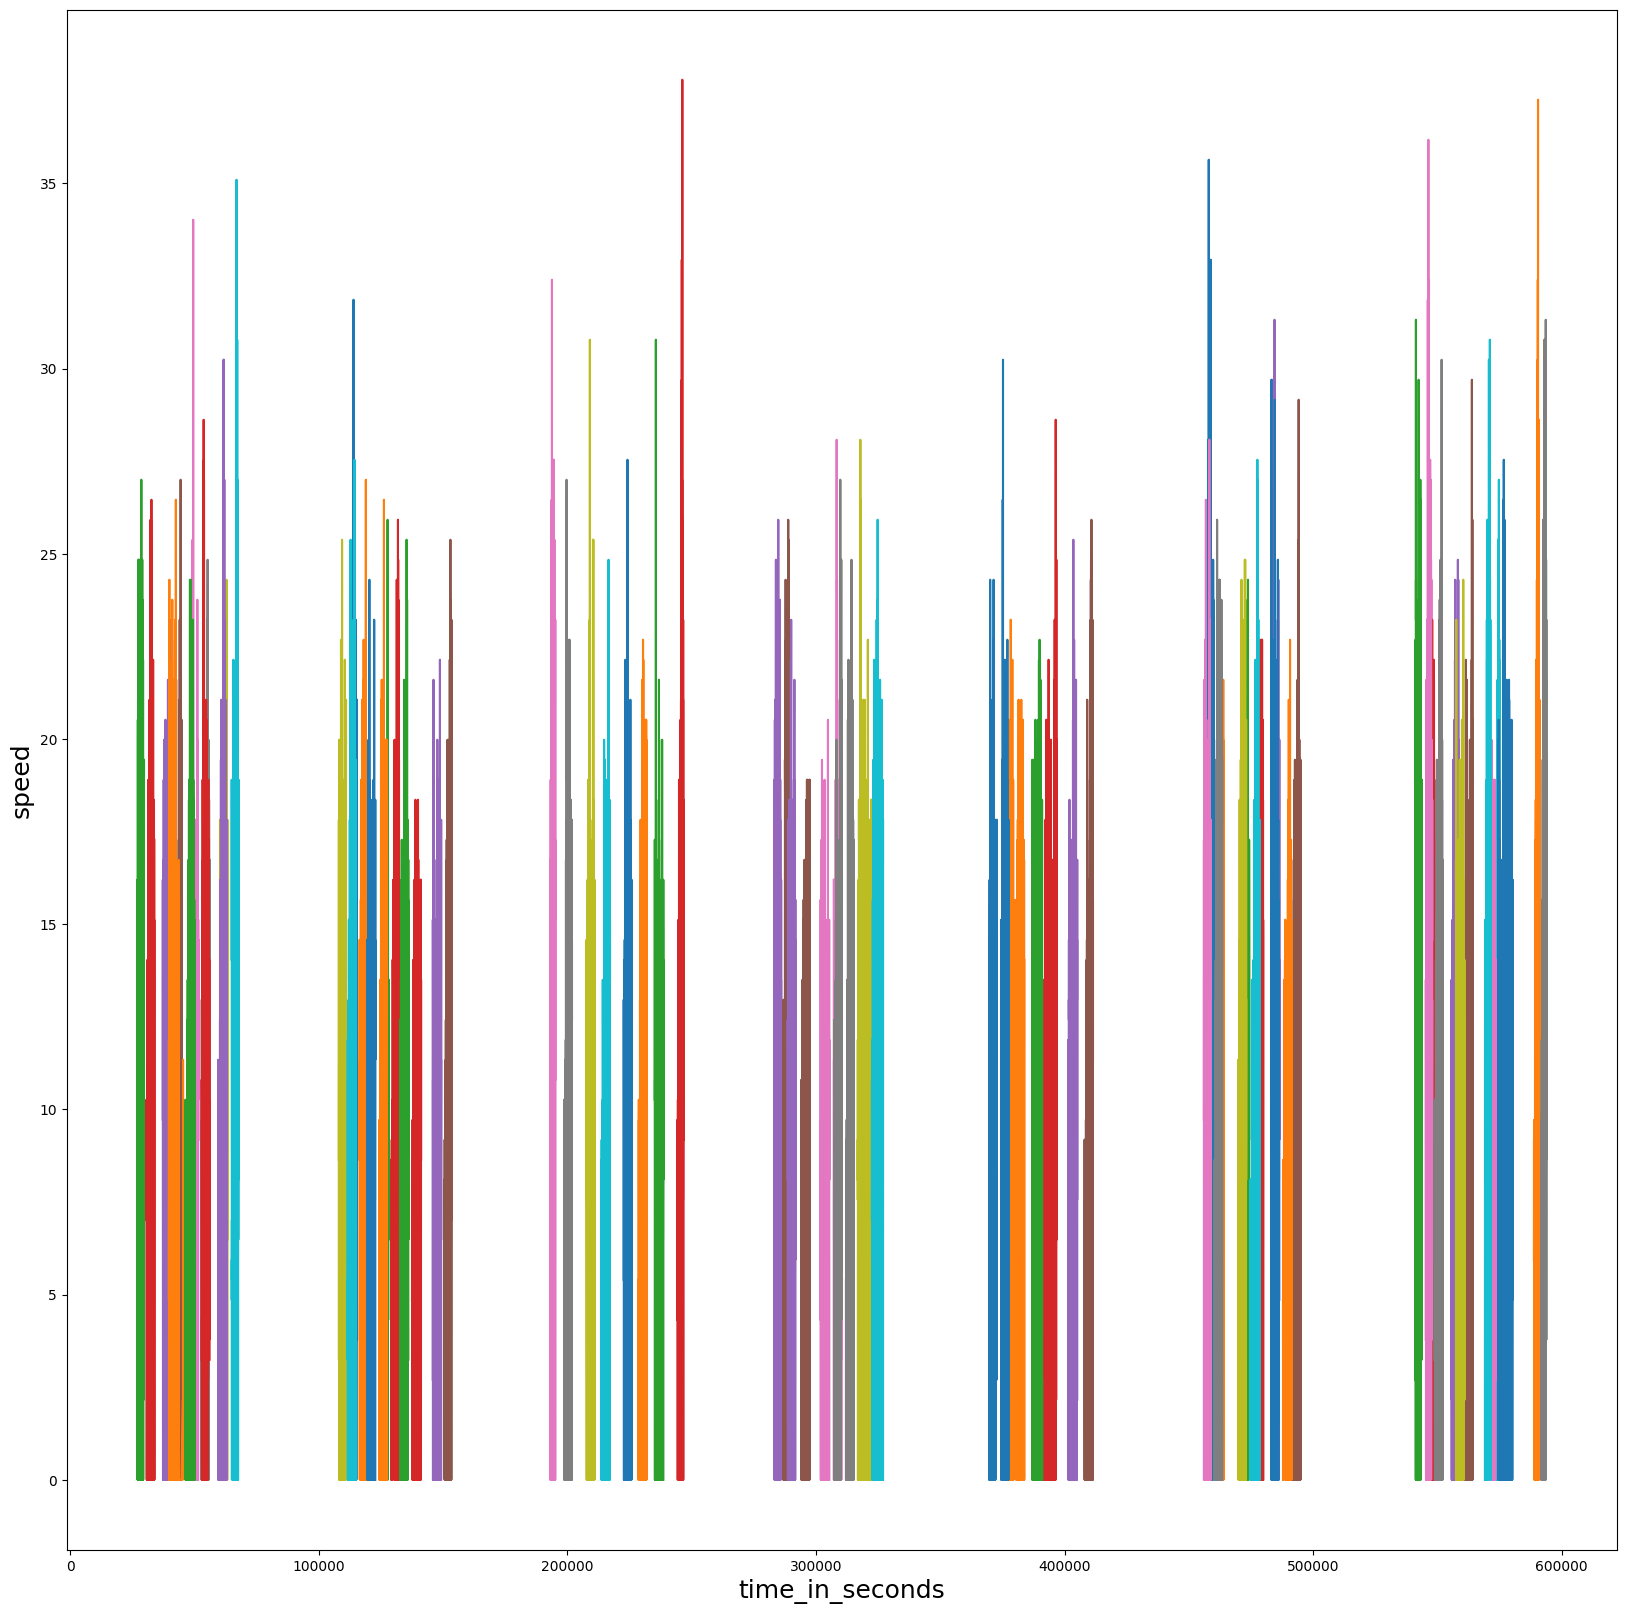

In [55]:
fig = plt.figure(figsize=(20,20))
id_list = data['trip_id'].unique()
for id in id_list:
  plt.plot(data[data['trip_id']==id]['time_in_seconds'],data[data['trip_id']==id]['speed'])
plt.xlabel('time_in_seconds',fontsize=18)
plt.ylabel('speed',fontsize=18)
plt.show()#not important to see the plotat